## Damped Oscillation (W2) - Sample Data Analysis

In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sympy import*
from scipy.optimize import curve_fit

This is a sample data:

`deltaX` is an array consisting of amplitudes (with its repetitions).

`mass` is the mass used in the experiment.

`time` is the time needed to complete all oscillations.

In [97]:
deltaX=np.array([[2.5, 1.6, 1.2, 0.9, 0.7, 0.5],[2.5, 1.4, 1.1, 0.9, 0.6, 0.5],[2.6, 1.7, 1, 0.9, 0.55, 0.5],[2.6, 1.5, 1.3, 1, 0.6, 0.5],[2.5, 1.5, 1.1, 1, 0.7, 0.5]])
mass=45e-3
time=np.array([2.88,2.79,2.81,2.85,2.89])

Finding the average displacement for all repetitions:

In [98]:
average_deltaX=np.zeros(deltaX[:,0].shape)
std_deltaX=np.zeros(deltaX[:,0].shape)
for i in range(len(deltaX[:,0])):
    average_deltaX[i]=np.mean(deltaX[:,i])
    std_deltaX[i]=np.std(deltaX[:,i])

Average time:

In [99]:
average_time=np.mean(time)
std_time=np.std(time)

Assuming that the displacements are evenly spaced, the frequency is:

In [100]:
frequency=len(deltaX[:,0])/(average_time)
frequency

1.7580872011251756

Propagating the error of the average time, the frequency has an uncertainty of:
$$\Delta f= \sqrt{\left( \frac{\partial \left(\frac{n}{t}\right)}{\partial t} \Delta t \right)^2}$$

In [101]:
t=Symbol('t')
f=5/t
f

5/t

In [102]:
dt=diff(f,t)
dt

-5/t**2

In [103]:
deltaf=np.sqrt((-5/(average_time**2)*std_time)**2)
deltaf

0.023973681891634208

The period uncertainty:

In [104]:
period=1/frequency
deltaT=np.sqrt((-1/(frequency**2)*deltaf)**2)
deltaT

0.007756287771866125

Plotting the amplitudes as a function of time:

Text(0, 0.5, 'Amplitude (cm)')

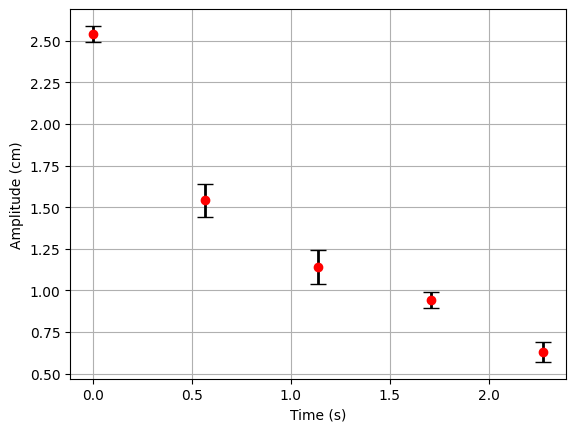

In [130]:
fig,ax=plt.subplots()
times=np.arange(0,average_time,1/frequency)
xerr=np.ones(times.shape)*deltaT
ax.errorbar(times,average_deltaX,std_deltaX,fmt='ro',linewidth=2, capsize=6,ecolor='black')
ax.grid(1)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (cm)")

Fitting the Data: Exponential curve-fitting

The Data Model:

In [106]:
def DataModel(t,A0,b):
    return A0*np.exp(-b*t)

Carry out the fit:

In [107]:
[popt,pcov]=curve_fit(DataModel,times,average_deltaX)

The optimal parameter ($A_0$ and $b$):

In [108]:
popt

array([2.45046196, 0.63580555])

The standard deviation of $A_0$ and $b$:

In [109]:
perr = np.sqrt(np.diag(pcov))
perr

array([0.12209016, 0.06588583])

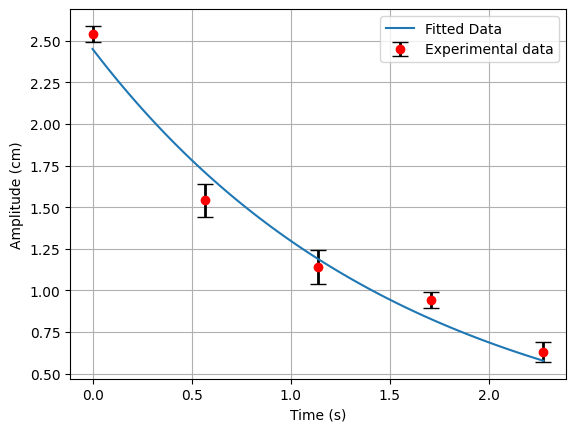

In [136]:
fig,ax=plt.subplots()
ax.errorbar(times,average_deltaX,std_deltaX,fmt='ro',linewidth=2, capsize=6,ecolor='black')
ax.plot(np.linspace(times[0],times[-1],100),DataModel(np.linspace(times[0],times[-1],100),popt[0],popt[1]),linewidth=1.5)
ax.grid(1)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (cm)")
ax.legend([ "Fitted Data","Experimental data"], loc="upper right")
plt.show()

Calculating the natural frequency and damped frequency:

$$F=kx$$
$$mg=kx$$
$$k=\frac{mg}{x}$$

In [111]:
k=(mass*9.81)/(2.7)
k

0.1635

Natural frequency:
$$\omega_0=\sqrt{\frac{k}{m}}$$

In [112]:
omega0=np.sqrt(k/mass)
omega0

1.9061304607327731

In [116]:
def FullOsc(x,A0,b,omega):
    return A0*np.exp(-b*x)*np.cos(omega*x)

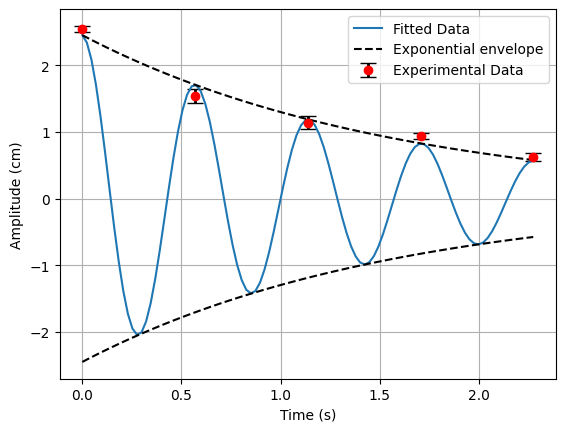

In [145]:
fig,ax=plt.subplots()
ax.errorbar(times,average_deltaX,std_deltaX,fmt='ro',linewidth=2, capsize=6,ecolor='black',label="Experimental Data")
xvalues=np.linspace(times[0],times[-1],100)
ax.plot(xvalues,FullOsc(xvalues,popt[0],popt[1],6.25*frequency),label="Fitted Data")
ax.plot(np.linspace(times[0],times[-1],100),DataModel(np.linspace(times[0],times[-1],100),popt[0],popt[1]),'k--',linewidth=1.5,label="Exponential envelope")
ax.plot(np.linspace(times[0],times[-1],100),-DataModel(np.linspace(times[0],times[-1],100),popt[0],popt[1]),'k--',linewidth=1.5)
ax.grid(1)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (cm)")
ax.legend(loc="upper right")
plt.show()

Calculating the viscosity of the medium:

Using the Stokes' Law, where
$$F_S=6\pi\eta r v$$
As the damping force is $F=-bv$, thus $$b=6\pi\eta r$$

Therefore, $$\eta=\frac{b}{6\pi r}$$

In [149]:
viscosity=popt[1]*1e-3/(6*3.141*4e-2)
viscosity

0.0008434224110881307

In [151]:
popt[1]

0.6358055503746766

The viscosity uncertainty ($\Delta \eta$) is determined by the uncertainty of $b$ and $r$. $b$ has an uncertainty of $0.06588583$ and $r$ has an uncertainty of $0.0005$.

$$\Delta \eta = \sqrt{\left( \frac{\partial \eta}{\partial b} \Delta b \right)^2 + \left( \frac{\partial \eta}{\partial r} \Delta r \right)^2}$$

The viscosity is $0.00084\pm0.000008$ in Pascal-seconds.